# Keras Fundamentals with NN

*This project demonstrates neural network fundamentals using Keras on the Diabetes dataset. 
It includes data preprocessing, training two simple NN architectures, evaluating performance with accuracy and ROC-AUC, and visualizing training loss and validation curves.*

In [25]:
# Need to install keras
#!pip install tensorflow

In [26]:
import pandas as pd

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Load dataset
df = pd.read_csv(
    filepath_or_buffer='diabetes.csv'
)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.shape

(768, 9)

In [31]:
# Features Matrix
X = df.iloc[:, :-1].values

# Target Matrix
y = df['Outcome'].values

In [32]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

# Random Forest ML

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Predict with RF
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Evaluate RF performance
acc_score = accuracy_score(y_test, y_pred_class_rf)
roc_score = roc_auc_score(y_test, y_pred_prob_rf[:, 1])

print(f'Accuracy is {acc_score:.3f}')
print(f'Roc-Auc is {roc_score:.3f}')

Accuracy is 0.753
Roc-Auc is 0.826


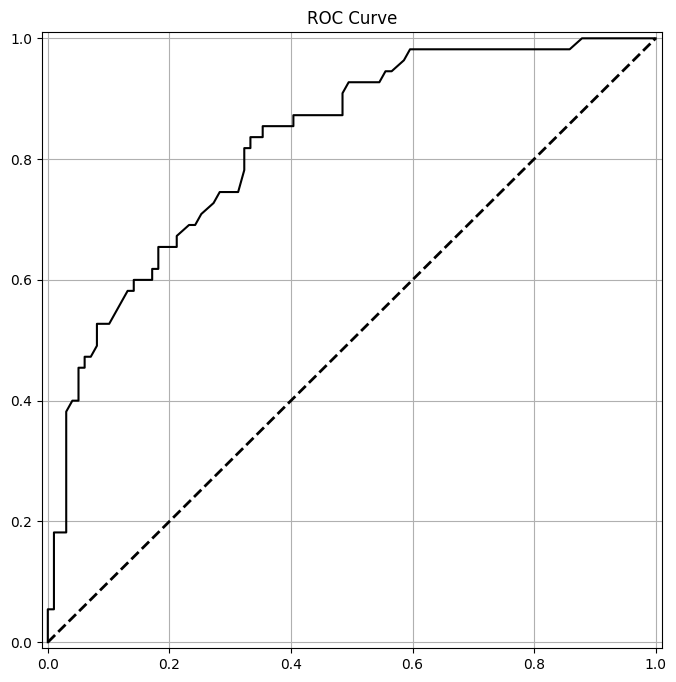

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Function to plot ROC curve
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax.grid(True)
    ax.set(
        title='ROC Curve',
        xlim=[-0.01, 1.01],
        ylim=[-0.01, 1.01]
    )

plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF-1')

In [36]:
from sklearn.preprocessing import StandardScaler

# Normalize features
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build NN model 1
model_1 = Sequential()

model_1.add(Dense(units=12, input_shape=(8,), activation='sigmoid'))

model_1.add(Dense(units=1, activation='sigmoid'))

In [38]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Install visualization tools
#!pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Plot NN architecture
model_1 = Sequential([
    Dense(12, activation='sigmoid', input_shape=(8,)),
    Dense(1,  activation='sigmoid')
])

# ➤ save diagram
plot_model(
    model_1,
    to_file="model_1_arch.png",  # output file
    show_shapes=True,            # show tensor shapes
    show_layer_names=True,       # show layer names
    dpi=120
)


In [41]:
from tensorflow.keras.optimizers import SGD

# Compile model

model_1.compile(
    optimizer=SGD(learning_rate=0.003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model 1
run_hist_1 = model_1.fit(
    X_train_norm,
    y_train,
    validation_data=(X_test_norm, y_test),
    epochs=200
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6531 - loss: 0.6770 - val_accuracy: 0.6429 - val_loss: 0.6814
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6729 - val_accuracy: 0.6429 - val_loss: 0.6774
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.6692 - val_accuracy: 0.6429 - val_loss: 0.6738
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6660 - val_accuracy: 0.6429 - val_loss: 0.6704
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.6630 - val_accuracy: 0.6429 - val_loss: 0.6670
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6598 - val_accuracy: 0.6429 - val_loss: 0.6639
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6571 - val_accuracy: 0.6429 - val_loss: 0.6614
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6548 - val_accuracy: 0.6429 - 

In [42]:
# Predict and evaluate NN 1
y_pred_prob_nn_1 = model_1.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype('int32')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [43]:
y_pred_class_nn_1[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [44]:
y_pred_prob_nn_1[:5]

array([[0.32233757],
       [0.21808507],
       [0.2334628 ],
       [0.42508933],
       [0.4001305 ]], dtype=float32)

In [45]:
acc_score = accuracy_score(y_test, y_pred_class_nn_1)
roc_score = roc_auc_score(y_test, y_pred_prob_nn_1)

print(f'Accuracy is {acc_score:.3f}')
print(f'Roc-Auc is {roc_score:.3f}')

Accuracy is 0.721
Roc-Auc is 0.819


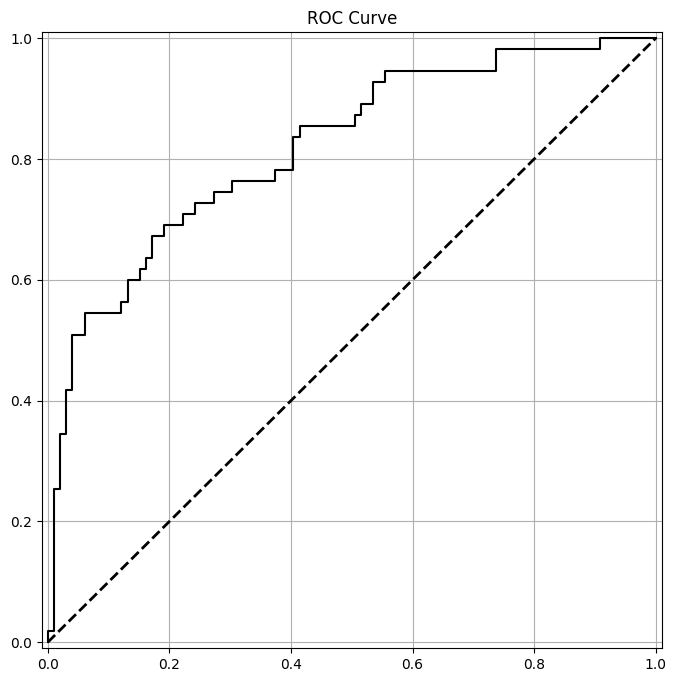

In [46]:
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

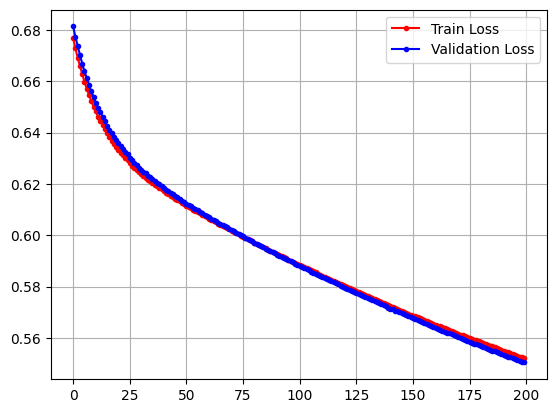

In [47]:
# Plot training and validation loss
fig, ax = plt.subplots()

ax.plot(
    run_hist_1.history['loss'], 
    color='r', 
    marker='.', 
    label='Train Loss'
)

ax.plot(
    run_hist_1.history['val_loss'], 
    color='b', 
    marker='.', 
    label='Validation Loss'
)

ax.legend()
ax.grid()

In [48]:
# Continue training NN 1
run_hist_2 = model_1.fit(
    X_train_norm,
    y_train,
    validation_data=(X_test_norm, y_test),
    epochs=1000
)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7052 - loss: 0.5518 - val_accuracy: 0.7208 - val_loss: 0.5501
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7068 - loss: 0.5515 - val_accuracy: 0.7273 - val_loss: 0.5498
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.5512 - val_accuracy: 0.7273 - val_loss: 0.5495
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7052 - loss: 0.5509 - val_accuracy: 0.7273 - val_loss: 0.5492
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.5506 - val_accuracy: 0.7273 - val_loss: 0.5489
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7036 - loss: 0.5503 - val_accuracy: 0.7273 - val_loss: 0.5486
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7020 - loss: 0.5500 - val_accuracy: 0.7273 - val_loss: 0.5482
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7020 - loss: 0.5497 - val_accuracy: 0.

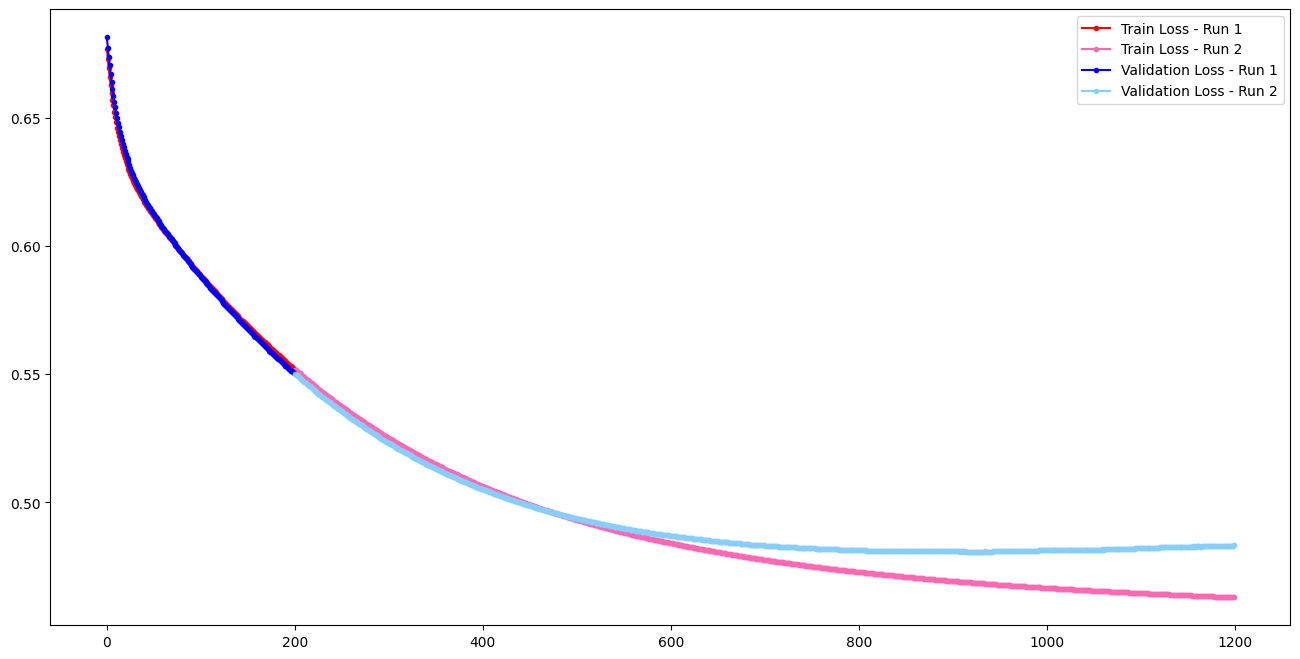

In [49]:
# Combine loss plots for both runs
n = len(run_hist_1.history['loss'])
m = len(run_hist_2.history['loss'])

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history['loss'], color='r', marker='.', label='Train Loss - Run 1')
ax.plot(range(n, n+m), run_hist_2.history['loss'], color='hotpink', marker='.', label='Train Loss - Run 2')

ax.plot(range(n), run_hist_1.history['val_loss'], color='b', marker='.', label='Validation Loss - Run 1')
ax.plot(range(n, n+m), run_hist_2.history['val_loss'], color='LightSkyBlue', marker='.', label='Validation Loss - Run 2')

ax.legend()

In [50]:
# Build NN model 2
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation='relu'))
model_2.add(Dense(6, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Compile model 2
model_2.compile(
    optimizer=SGD(learning_rate=0.003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model 2
run_hist_2 = model_2.fit(
    X_train_norm,
    y_train,
    validation_data=(X_test_norm, y_test),
    epochs=1500
)

Epoch 1/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6466 - loss: 0.7328 - val_accuracy: 0.6299 - val_loss: 0.8318
Epoch 2/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6433 - loss: 0.7191 - val_accuracy: 0.6299 - val_loss: 0.8148
Epoch 3/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6450 - loss: 0.7072 - val_accuracy: 0.6299 - val_loss: 0.7976
Epoch 4/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6482 - loss: 0.6950 - val_accuracy: 0.6169 - val_loss: 0.7837
Epoch 5/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6482 - loss: 0.6852 - val_accuracy: 0.6169 - val_loss: 0.7706
Epoch 6/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.6758 - val_accuracy: 0.6169 - val_loss: 0.7585
Epoch 7/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6482 - loss: 0.6674 - val_accuracy: 0.6234 - val_loss: 0.7472
Epoch 8/1500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6531 - loss: 0.6591 - val_accuracy: 0

Text(0.5, 1.0, 'Accuracy Over Iterations')

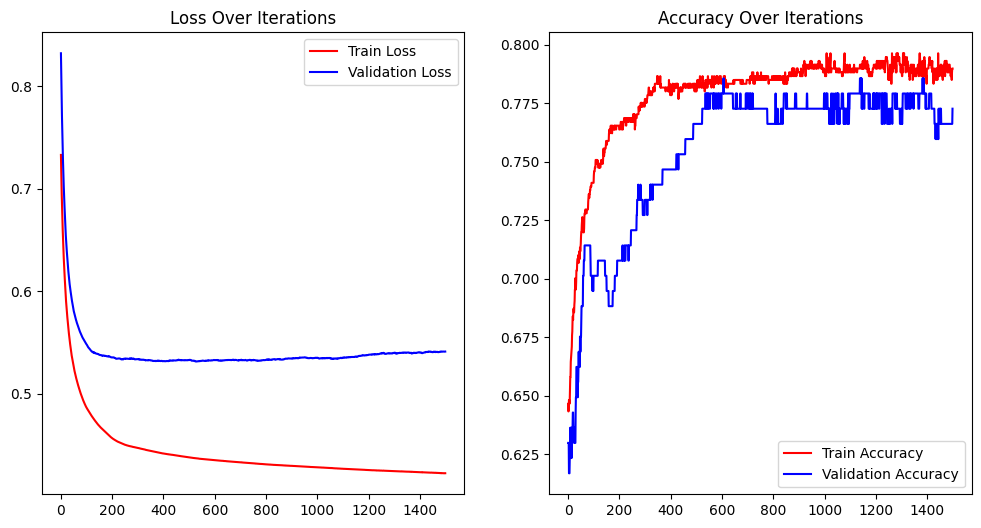

In [51]:
# Plot NN2 training curves
n = len(run_hist_2.history['loss'])

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history['loss']), color='r', label='Train Loss')
ax.plot(range(n), (run_hist_2.history['val_loss']), color='b', label='Validation Loss')

ax.legend()
ax.set_title('Loss Over Iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history['accuracy']), color='r', label='Train Accuracy')
ax.plot(range(n), (run_hist_2.history['val_accuracy']), color='b', label='Validation Accuracy')

ax.legend(loc='lower right')
ax.set_title('Accuracy Over Iterations')

In [52]:
# Predict and evaluate NN 2
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype('int32')

acc_nn_2 = accuracy_score(y_test, y_pred_class_nn_2)
roc_auc_2 = roc_auc_score(y_test, y_pred_prob_nn_2)

print(
    f'Accuracy Score: {acc_nn_2:.2f}\n'
    f'ROC-AUR: {roc_auc_2:.2f}'
)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002028C6880D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy Score: 0.77
ROC-AUR: 0.80


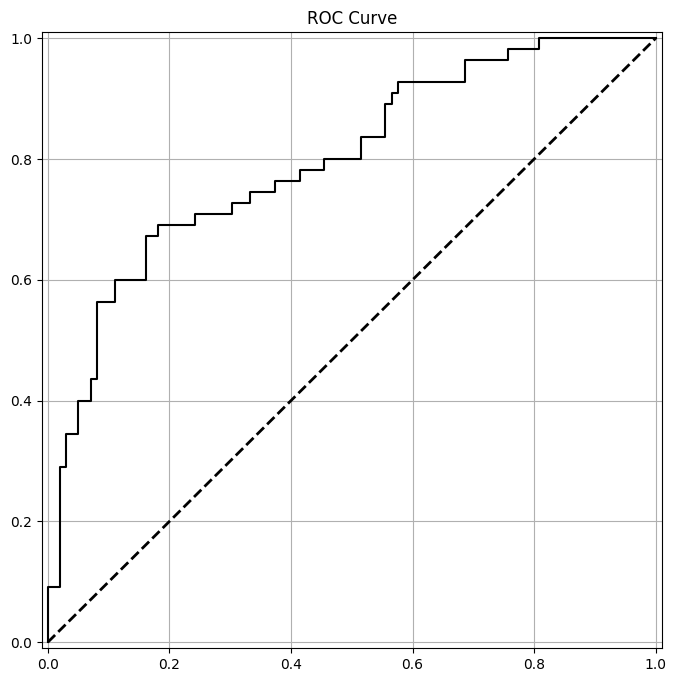

In [53]:
plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')